In [1]:
import matplotlib.pyplot as plt
import cv2 #openCV

In [3]:
!pip install openCV-python

In [12]:
cat= cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

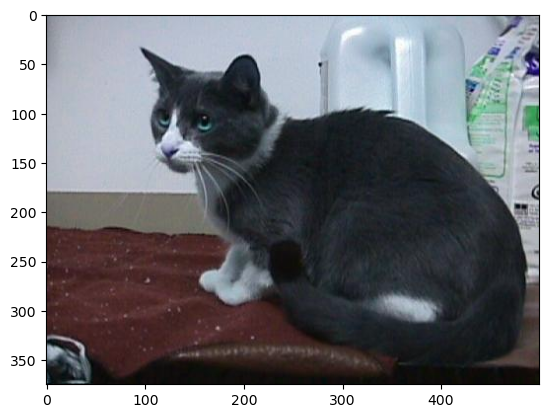

In [13]:
plt.imshow(cat)

In [8]:
cat_rgb= cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

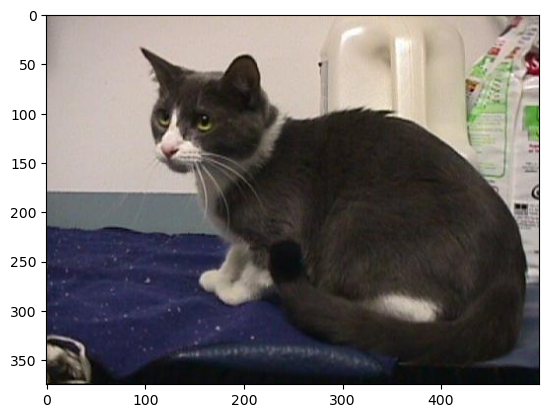

In [9]:
plt.imshow(cat_rgb)

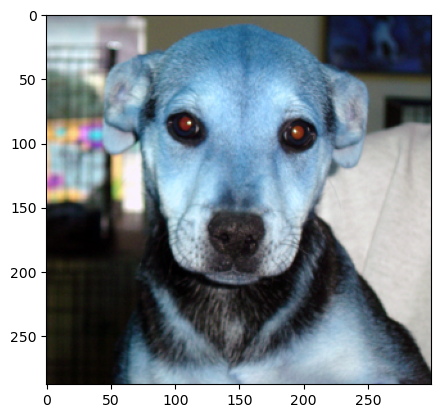

In [24]:
dog= cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/4.jpg')
plt.imshow(dog)#cv2.cvtColor(dog, cv2.COLOR_BGR2RGB))

# Shapes

In [16]:
dog.shape

(288, 300, 3)

In [17]:
cat.shape

(375, 500, 3)

# Preparing the Data for the Model

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
image_gen= ImageDataGenerator(rotation_range=30, #Rotation of Image
                              width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

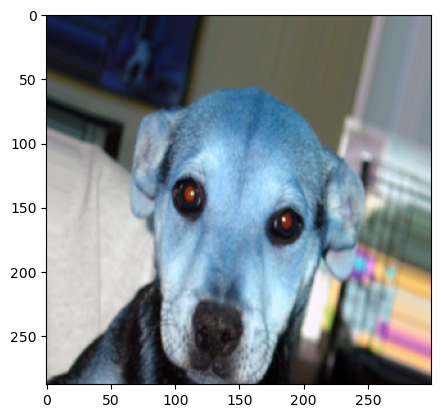

In [33]:
plt.imshow(image_gen.random_transform(dog))

# Making a flow (Pipeline)

In [40]:
train_img = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [37]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [41]:
train_img.class_indices

{'CAT': 0, 'DOG': 1}

# Building The Model

In [43]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [46]:
model= Sequential()

# First Conv Layer - Asghar Rehman
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Layer - Mahwish Naz
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third layer - Samia
model.add(Conv2D(filters=40, kernel_size=(5,5), activation='silu'))
model.add(Conv2D(filters=65, kernel_size=(8,8), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Bilal's Layers
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #Regularization Techniques

#Output Layer (Cat=0 Dog=1)
model.add(Dense(1, activation='sigmoid'))


In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      1568      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 40)        64040     
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 65)       